In [22]:
# MNIST dataset(숫자 이미지) 숫자 분류 모델 작성 - 다항분류
# 숫자 손글씨 이미지에 대한 데이터와 라벨이 포함되어 있으며 60000개의 트레이닝 데이터와 10000개의 테스트 데이터가 있다
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Activation, Dropout, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


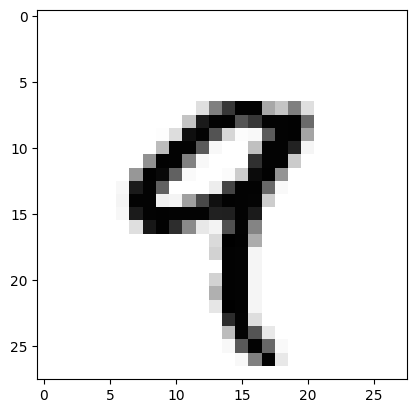

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# print(x_train[0]) # 0번째 feature
# print(y_train[0]) # 0번째 label

# for i in x_train[0]:
#     for j in i:
#         sys.stdout.write('%s  '%j)
#     sys.stdout.write('\n')

plt.imshow(x_train[4], cmap='Grays')
plt.show()
plt.close()

In [13]:
x_train = x_train.reshape(60000, 784).astype('float32') # 28*28 => 784 열로 변경
x_test = x_test.reshape(10000, 784).astype('float32')

# 정규화 (필수는 아니지만, 해주면 모델 성능 향상)
x_train /= 255.0
x_test /= 255.0

# label - OneHotEncoding 출력층 활성화 함수로 softmax를 사용하기 때문
# print(np.unique(y_train)) # [0 1 2 3 4 5 6 7 8 9]

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# validation data
x_val = x_train[50000:60000]
y_val = y_train[50000:60000]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [29]:
# 모델
model = Sequential()
model.add(Input(shape=(784, )))
'''
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
'''
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

history = model.fit(x_train, y_train, epochs=13, validation_data=(x_val, y_val), batch_size=128, verbose=2)

Epoch 1/13
391/391 - 6s - 16ms/step - accuracy: 0.8235 - loss: 0.5865 - val_accuracy: 0.9223 - val_loss: 0.2633
Epoch 2/13
391/391 - 6s - 14ms/step - accuracy: 0.8989 - loss: 0.3395 - val_accuracy: 0.9386 - val_loss: 0.2122
Epoch 3/13
391/391 - 6s - 14ms/step - accuracy: 0.9123 - loss: 0.2963 - val_accuracy: 0.9454 - val_loss: 0.1899
Epoch 4/13
391/391 - 6s - 14ms/step - accuracy: 0.9214 - loss: 0.2632 - val_accuracy: 0.9526 - val_loss: 0.1699
Epoch 5/13
391/391 - 6s - 14ms/step - accuracy: 0.9267 - loss: 0.2433 - val_accuracy: 0.9562 - val_loss: 0.1504
Epoch 6/13
391/391 - 6s - 14ms/step - accuracy: 0.9306 - loss: 0.2264 - val_accuracy: 0.9622 - val_loss: 0.1380
Epoch 7/13
391/391 - 6s - 14ms/step - accuracy: 0.9366 - loss: 0.2124 - val_accuracy: 0.9618 - val_loss: 0.1322
Epoch 8/13
391/391 - 6s - 14ms/step - accuracy: 0.9386 - loss: 0.2008 - val_accuracy: 0.9648 - val_loss: 0.1279
Epoch 9/13
391/391 - 6s - 14ms/step - accuracy: 0.9418 - loss: 0.1906 - val_accuracy: 0.9644 - val_loss:

loss : [0.5865291953086853, 0.33947518467903137, 0.29632893204689026, 0.26323944330215454, 0.24326664209365845, 0.22644373774528503, 0.2123856246471405, 0.2008037120103836, 0.19058942794799805, 0.1849910020828247, 0.17893387377262115, 0.16769517958164215, 0.16313739120960236]
val_loss : [0.26327911019325256, 0.21223591268062592, 0.18989160656929016, 0.16989754140377045, 0.15040500462055206, 0.13799059391021729, 0.13221709430217743, 0.1279248595237732, 0.12276839464902878, 0.11465385556221008, 0.11158278584480286, 0.10757956653833389, 0.10844045132398605]
accuracy : [0.8234599828720093, 0.8988999724388123, 0.9122999906539917, 0.9213600158691406, 0.9266999959945679, 0.9305800199508667, 0.9365599751472473, 0.9386199712753296, 0.9417799711227417, 0.9437599778175354, 0.9452599883079529, 0.9478600025177002, 0.950219988822937]
val_accuracy : [0.9222999811172485, 0.9386000037193298, 0.9453999996185303, 0.9526000022888184, 0.9562000036239624, 0.9621999859809875, 0.9617999792098999, 0.9648000001

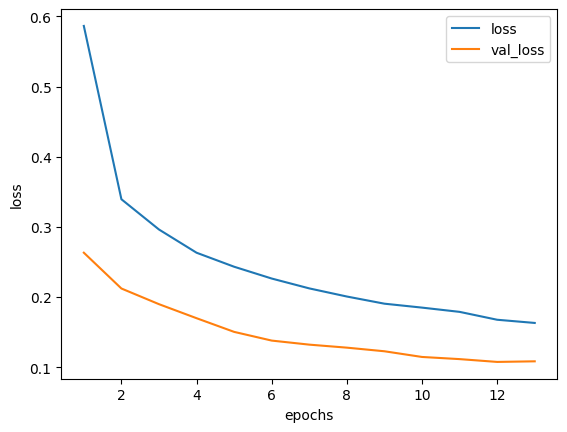

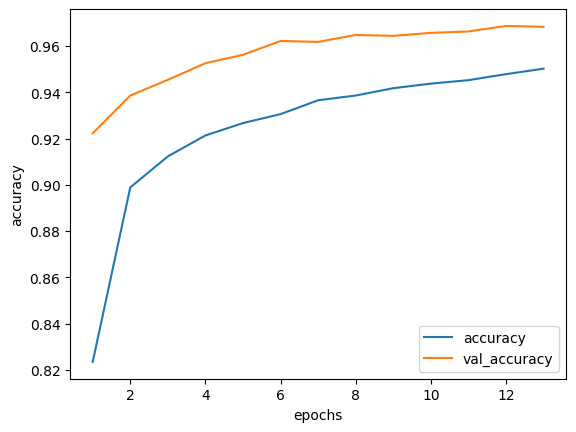

In [30]:
print(f"loss : {history.history['loss']}")
print(f"val_loss : {history.history['val_loss']}")
print(f"accuracy : {history.history['accuracy']}")
print(f"val_accuracy : {history.history['val_accuracy']}")

epochs = range(1, len(history.history['loss'])+ 1)
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.clf()
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [31]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print(f"loss : {score[0]}")
print(f"acc : {score[1]}")

# 모델 저장
model.save('tf27model.keras')

loss : 0.11384989321231842
acc : 0.9643999934196472


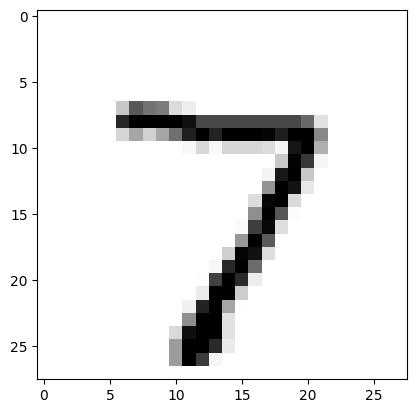

In [27]:
loadModel = load_model('tf27model.keras')

plt.imshow(x_test[:1].reshape(28,28), cmap='Greys')
plt.show()
plt.close()

In [28]:

pred = loadModel.predict(x_test[:1])
# pred는 확률값
print(f"예측값 : {np.argmax(pred, 1)}")
print(f"실제값 : {np.argmax(y_test[:1], 1)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
예측값 : [7]
실제값 : [7]
